# Data Loading and Initial Analysis
Load the laptop dataset using pandas, display basic information about the dataset, and handle any missing values.

In [52]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/laptop_price.csv")

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()  # Dropping rows with missing values for simplicity

# Display the first few rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1299 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1302 non-null   object 
 4   Inches            1302 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1301 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1302 non-null   object 
 9   Gpu               1302 non-null   object 
 10  OpSys             1302 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None
         laptop_ID       Inches  Price_euros
count  1303.000000  1302.000000  1303.000000
mean    660.155794    15.018

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [53]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

# Feature Engineering Function
Create a function to process features: extract numeric values from RAM, Weight, convert screen resolution to pixels, encode categorical variables like Company and CPU type.

In [54]:
def feature_engineering(df):
    # Ensure RAM and Weight columns are of string type
    df["Ram"] = df["Ram"].astype(str)
    df["Weight"] = df["Weight"].astype(str)

    # Extract numeric values from RAM and Weight
    df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)
    df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)

    # Encode categorical variables
    label_encoders = {}
    for column in ["Company", "Cpu", "Gpu", "OpSys"]:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders


# Apply feature engineering
df, label_encoders = feature_engineering(df)

# Display the first few rows of the processed dataset
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,65,8,128GB SSD,58,8,1.37,1339.69
1,2,1,Macbook Air,Ultrabook,13.3,1440x900,63,8,128GB Flash Storage,51,8,1.34,898.94
2,3,7,250 G6,Notebook,15.6,Full HD 1920x1080,74,8,256GB SSD,53,4,1.86,575.00
3,4,1,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,84,16,512GB SSD,9,8,1.83,2537.45
4,5,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,67,8,256GB SSD,59,8,1.37,1803.60


In [55]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [56]:
#from sklearn.impute import SimpleImputer

#num_imputer = SimpleImputer(strategy='mean')
#df[['Inches', 'Weight', 'Price_euros']] = num_imputer.fit_transform(df[['Inches', 'Weight', 'Price_euros']])

#cat_imputer = SimpleImputer(strategy='most_frequent')
#df[['Company', 'Cpu', 'Gpu', 'OpSys']] = cat_imputer.fit_transform(df[['Company', 'Cpu', 'Gpu', 'OpSys']])

# Data Preprocessing and Split
Scale numerical features using StandardScaler, perform train-test split on the processed features and target variable (Price_euros).

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define features and target variable
X = df[["Company", "Cpu", "Gpu", "OpSys", "Ram", "Weight"]]
y = df["Price_euros"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values in X_train and X_test
print("Initial missing values in X_train:", X_train.isna().sum().sum())
print("Initial missing values in X_test:", X_test.isna().sum().sum())

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Use mean or median depending on data distribution
X_train[["Ram", "Weight"]] = imputer.fit_transform(X_train[["Ram", "Weight"]])
X_test[["Ram", "Weight"]] = imputer.transform(X_test[["Ram", "Weight"]])


# Scale numerical features
scaler = StandardScaler()
X_train[["Ram", "Weight"]] = scaler.fit_transform(X_train[["Ram", "Weight"]])
X_test[["Ram", "Weight"]] = scaler.transform(X_test[["Ram", "Weight"]])

# Display the first few rows of the training set
X_train.head()

Initial missing values in X_train: 0
Initial missing values in X_test: 0


,Company,Cpu,Gpu,OpSys,Ram,Weight
1075,10,68,21,5,-0.077602,1.410334
971,4,90,47,5,-0.077602,-0.825456
808,4,101,76,5,1.541854,0.843934
341,10,5,7,5,0.732126,0.217913
671,10,74,24,5,-0.077602,-0.229245


In [58]:
# Verify no missing values in X_train and X_test
print("Missing values in X_train after imputation:", X_train.isna().sum().sum())
print("Missing values in X_test after imputation:", X_test.isna().sum().sum())


Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0


# Model Training
Train a RandomForestRegressor model on the processed features to predict laptop prices.

In [59]:
# Verify No Missing Values in X_train and X_test
print("Missing values in X_train:", X_train.isna().sum().sum())
print("Missing values in X_test:", X_test.isna().sum().sum())

Missing values in X_train: 0
Missing values in X_test: 0


In [60]:
from sklearn.linear_model import LinearRegression

# Train LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions with LinearRegression model
lr_y_pred = lr_model.predict(X_test)

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Train the RandomForestRegressor model
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)

# Make predictions on the test set
rfr_y_pred = rfr_model.predict(X_test)

# Model Evaluation

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

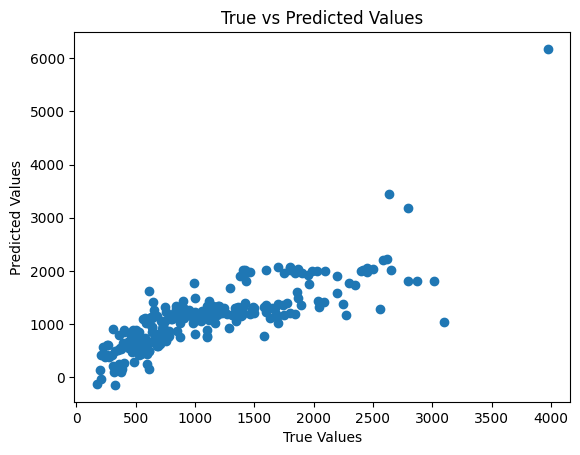

In [63]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lr_y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [64]:
print(f"Min value in y_test: {min(y_test)}")
print(f"Max value in y_test: {max(y_test)}")
print(f"Mean value of y_test: {np.mean(y_test)}")

Min value in y_test: 174.0
Max value in y_test: 3975.0
Mean value of y_test: 1100.2299999999998


In [65]:
# Assuming we have predictions lr_y_pred and true labels y_test
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, lr_y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 296.60014769499685


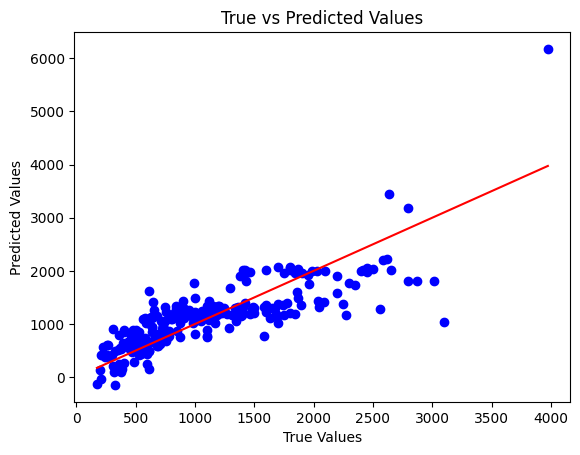

In [66]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lr_y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect predictions
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()


In [67]:
mse = mean_squared_error(y_test, lr_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 165512.53938974033
Root Mean Squared Error (RMSE): 406.8323234328122
R-squared (R²): 0.6269408047987459


**Mean Squared Error (MSE) - 165512.54**

    MSE is the average of the squared differences between the actual and predicted values.
    A large MSE value indicates that the model's predictions are significantly off from the true values. Since MSE is in squared units of the target variable, the interpretation is less intuitive.

**R-squared (R²) - 0.627**

    R² is a measure of how well the model explains the variance in the target variable.
    R² values range from 0 to 1, where:
        - 1 means perfect prediction (all variance is explained).
        - 0 means that the model doesn't explain any of the variance in the target variable.

In this case, an R² of 0.627 means that the model explains about 62.7% of the variance in the target variable. While this is a reasonable performance, it's not a perfect model. This suggests that there is still a significant portion of the variance in the target variable that is unexplained by the model.

# Improve the model’s performance